 # Word size versus segment length

In [4]:
import os

language=os.getenv('language')
language='amharic'

In [3]:
stage=f'NIST'

In [5]:
from glob import glob
transcripts = list(sorted(glob(f'{stage}/openasr20_{language}/build/transcription_split/*.txt')))
len(transcripts)

10332

In [18]:
sample_rate=8000

In [44]:
from tqdm import tqdm
import librosa
lengths=[]
for transcript_file in tqdm(transcripts):
    with open(transcript_file,'r') as f:
        sentence=f.read().strip().split(' ')
        n_words = len(sentence)
    audio_file = transcript_file.replace('/transcription_split/', '/audio_split/').replace('.txt','.wav')
    x_np,sr=librosa.load(audio_file, sr=sample_rate)
    n_samples = x_np.shape[0]
    lengths.append((n_samples, n_words, sentence, transcript_file, audio_file))

100%|██████████| 10332/10332 [00:01<00:00, 7134.76it/s]


Text(0.5, 1.0, 'amharic: Sentence distribution in words and seconds')

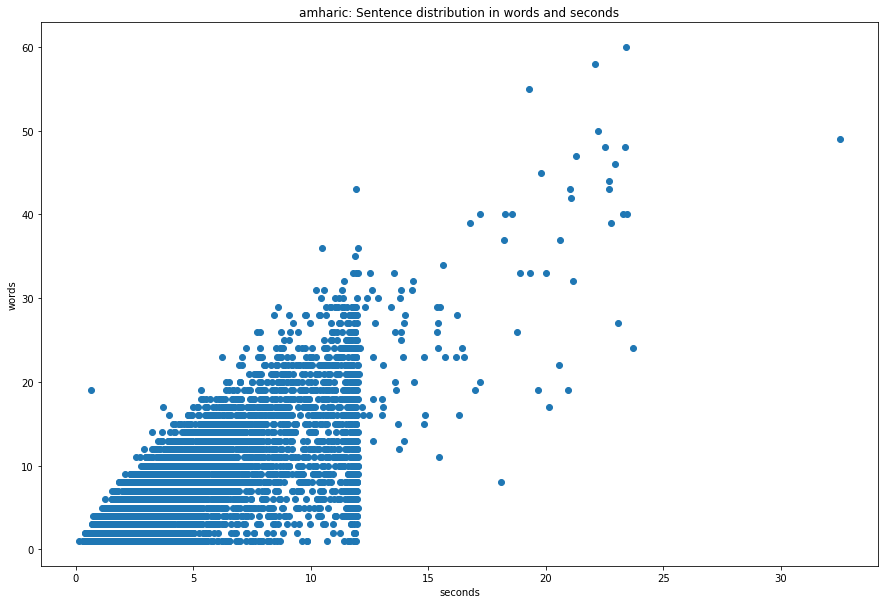

In [46]:
%matplotlib inline
from matplotlib.pylab import *
X=np.array([x for x,y,z,t,a in lengths])/sample_rate
Y=[y for x,y,z,t,a in lengths]
figure(figsize=(15,10))
scatter(X,Y);
xlabel('seconds')
ylabel('words')
title(f'{language}: Sentence distribution in words and seconds')

In [47]:
samples_per_word=list(sorted([x/y for x,y,z,t,a in lengths]))

Text(0.5, 1.0, 'amharic: Distribution of samples per word')

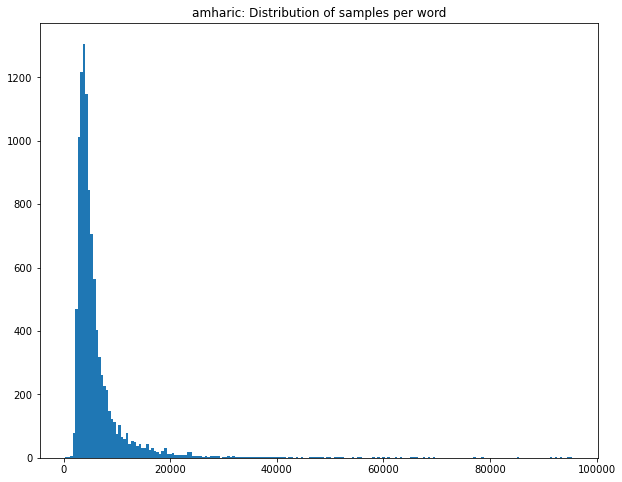

In [48]:
figure(figsize=(10,8))
hist(samples_per_word, bins=200);
title(f'{language}: Distribution of samples per word')

In [50]:
[(x,y,z,t,a) for x,y,z,t,a in lengths if x/y > 80000]

[(94640,
  1,
  ['እ'],
  'NIST/openasr20_amharic/build/transcription_split/BABEL_OP3_307_22612_20140624_171814_inLine_082.txt',
  'NIST/openasr20_amharic/build/audio_split/BABEL_OP3_307_22612_20140624_171814_inLine_082.wav'),
 (93280,
  1,
  ['ጳጳስ'],
  'NIST/openasr20_amharic/build/transcription_split/BABEL_OP3_307_41685_20140825_205956_inLine_017.txt',
  'NIST/openasr20_amharic/build/audio_split/BABEL_OP3_307_41685_20140825_205956_inLine_017.wav'),
 (95440,
  1,
  ['አሀ'],
  'NIST/openasr20_amharic/build/transcription_split/BABEL_OP3_307_79429_20140826_212728_inLine_012.txt',
  'NIST/openasr20_amharic/build/audio_split/BABEL_OP3_307_79429_20140826_212728_inLine_012.wav'),
 (93120,
  1,
  ['እሺ'],
  'NIST/openasr20_amharic/build/transcription_split/BABEL_OP3_307_79429_20140826_212728_inLine_019.txt',
  'NIST/openasr20_amharic/build/audio_split/BABEL_OP3_307_79429_20140826_212728_inLine_019.wav'),
 (94720,
  1,
  ['ነዋሪ'],
  'NIST/openasr20_amharic/build/transcription_split/BABEL_OP3_307_9

In [51]:
x=[1,2,3,1,2,1,2,1,1,5]

In [81]:
def trim_to_repeat(S):
    n=len(S)
    max_window = n//2
    for window in range(1,max_window+1):
        for i in range(n-window):
            left=S[i:i+window]
            right=S[i+window:i+2*window]
            if left==right:
                print("got it", window, n, i, left, right)
                return S[0:i+window]
    return S

In [82]:
x='thì cứ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ từ'

In [83]:
trim_to_repeat(x)

got it 1 29 2 ['từ'] ['từ']


['thì', 'cứ', 'từ']

In [57]:
i=3
window=2
S=x
n=len(S)
S[i:i+window], S[i+window:i+2*window]

([1, 2], [1, 2])

In [58]:
n

10

In [59]:
list(range(1,4))

[1, 2, 3]

In [60]:
list(range(n-2))

[0, 1, 2, 3, 4, 5, 6, 7]